In [1]:
from inference import *
ipt   = np.load('weights/input.npy') # (1, 1600, 36, 36, 3)
state = load_state('weights/state.gz')

In [2]:
"""
pip install onnxruntime
"""
model = load_model_onnx('weights/model.onnx')
r, final_state = inference(ipt[0], model, state)

Inference FPS: 175.7


In [3]:
"""
linux only
pip install ai_edge_litert
"""
model = load_model_litert('weights/model.tflite')
r, final_state = inference(ipt[0], model, state)

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


Inference FPS: 308.1


In [4]:
"""
for cpu :
pip install jax, keras

for gpu (linux only) :
pip install jax[cuda], keras
"""
model = load_model_jax('weights/FacePhys.weights.h5')
state_jax = model.init_state
r, final_state = inference(ipt[0], model, state_jax)

Inference FPS: 1003.9


In [5]:
"""
pip install onnxruntime-gpu
"""
model = load_model_onnx_cuda('weights/model.onnx')
r, final_state = inference(ipt[0], model, state)

Inference FPS: 93.8


In [6]:
"""
pip install tensorrt, pycuda

First, compile the ONNX to target hardware machine code (target.engin), 
then load it.
"""
onnx2trt('weights/model.onnx', 'target.engin')
model = load_model_trt('target.engin')
r, final_state = inference(ipt[0], model, state)

[12/23/2025-06:09:43] [TRT] [W] onnx2trt_utils.cpp:374: Your ONNX model has been generated with INT64 weights, while TensorRT does not natively support INT64. Attempting to cast down to INT32.
[12/23/2025-06:18:25] [TRT] [W] TensorRT encountered issues when converting weights between types and that could affect accuracy.
[12/23/2025-06:18:25] [TRT] [W] If this is not the desired behavior, please modify the weights or retrain with regularization to adjust the magnitude of the weights.
[12/23/2025-06:18:25] [TRT] [W] Check verbose logs for the list of affected weights.
[12/23/2025-06:18:25] [TRT] [W] - 59 weights are affected by this issue: Detected subnormal FP16 values.
[12/23/2025-06:18:25] [TRT] [W] - 3 weights are affected by this issue: Detected values less than smallest positive FP16 subnormal value and converted them to the FP16 minimum subnormalized value.
[12/23/2025-06:18:25] [TRT] [W] - 1 weights are affected by this issue: Detected finite FP32 values which would overflow in 

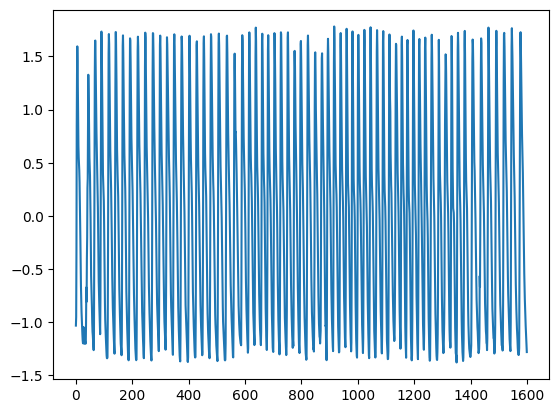

In [7]:
import matplotlib.pyplot as plt 
plt.plot(r)